In [2]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy.stats import norm, multivariate_normal
import matplotlib.pyplot as plt


#2

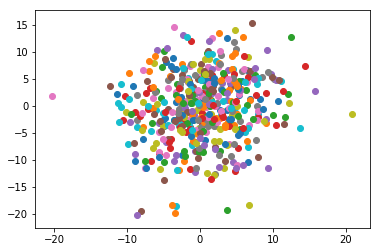

In [58]:
N = 1000
K = 1
D = 2
w = np.array([[1], [3]])
sigma = 5

def make_data(N, D, K, sigma):
    data = np.zeros((N, D))

    
    for i in range(N):
        z = np.random.normal(0, 1)
        x = np.random.normal(w * z, sigma)
        plt.scatter(x[0], x[1])
        data[i, 0] = x[0]
        data[i, 1] = x[1]
    
    return data

data = make_data(500, D, K, 5)

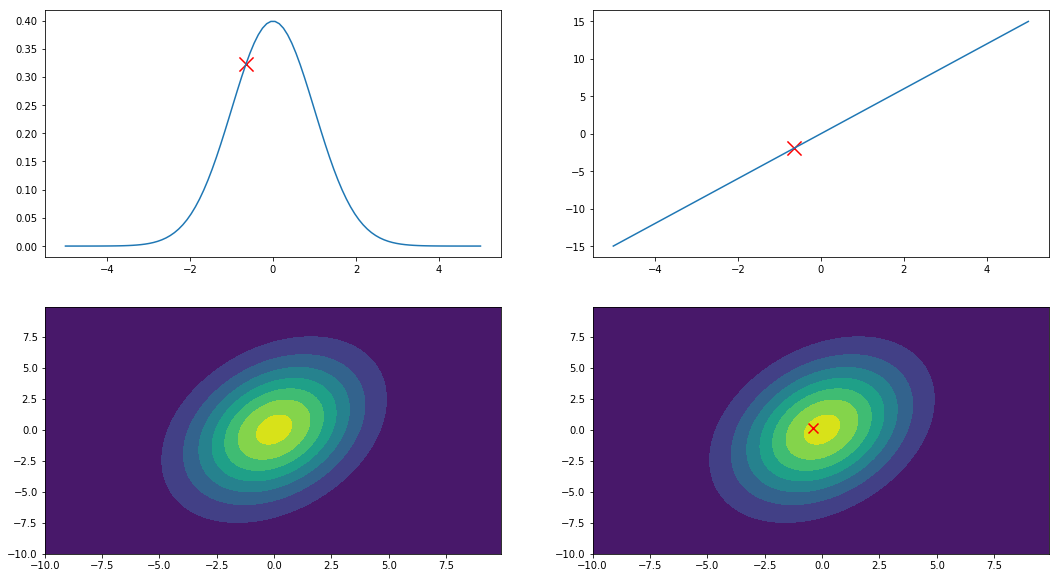

In [388]:
p, ax = plt.subplots(2, 2)

p.set_size_inches(18, 10)

seq = np.linspace(-5, 5, 100)

x = np.random.normal(0, 1)

ax[0, 0].plot(seq, norm.pdf(seq, 0, 1))

ax[0,0].scatter(x, norm.pdf(x, 0, 1), color='red', marker='x', s=200)

ax[0, 1].plot((seq * w)[0], (seq * w)[1])

ax[0,1].scatter((x * w)[0], (x * w)[1], color='red', marker='x', s=200)

center = [0, 0]

cov = np.matmul(w, np.transpose(w)) + np.eye(2) * 5

res = multivariate_normal(center, cov)
xx, yy = np.mgrid[-10:10:.1, -10:10:.1]

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy
ax[1,0].contourf(xx, yy, res.pdf(pos))

x, y = (np.random.multivariate_normal((w * x).reshape(2), 5 * np.eye(2)))

ax[1, 1].contourf(xx, yy, res.pdf(pos))
ax[1, 1].scatter(x, y, color='red', marker='x', s=100)



In [73]:
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math

#3

In [301]:
def loadMNIST( prefix, folder ):
    intType = np.dtype( 'int32' ).newbyteorder( '>' )
    nMetaDataBytes = 4 * intType.itemsize

    data = np.fromfile('t10k-images-idx3-ubyte', dtype = 'ubyte' )
    magicBytes, nImages, width, height = np.frombuffer( data[:nMetaDataBytes].tobytes(), intType )
    data = data[nMetaDataBytes:].astype( dtype = 'float32' ).reshape( [ nImages, width, height ] )

    labels = np.fromfile('t10k-labels-idx1-ubyte',
                          dtype = 'ubyte' )[2 * intType.itemsize:]

    return data, labels

x_train, y_train = loadMNIST( "train", "../datasets/mnist/" )
x_test, y_test = loadMNIST( "t10k", "../datasets/mnist/" )

In [302]:
N = 1000
x_train = x_train[:N, :, :].reshape(N, 28*28)
y_train = y_train[:N]

In [303]:
def neighbors(X, s=1000000):
    p = squareform(pdist(X, "sqeuclidean")) / (2 * s)
    return np.exp(-p + np.min(p)) / (np.sum(np.exp(-p + np.min(p)), axis=1))
    
X = PCA(50, whiten=True).fit_transform(x_train)

In [304]:

z = X[:N, :2]
ps = neighbors(X)
q = neighbors(z, 1)


In [184]:
tsn = TSNE(n_components=2)
fit = tsn.fit_transform(X)

1000


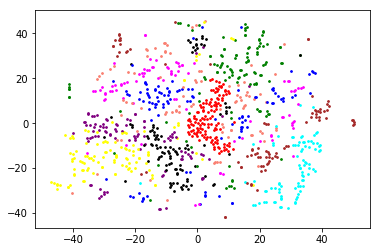

In [185]:
print(len(y_train))

c = {
    0: 'brown',
    1: 'red',
    2: 'green',
    3: 'blue',
    4: 'yellow',
    5: 'magenta',
    6: 'cyan',
    7: 'black',
    8: 'salmon',
    9: 'purple'
}

for i in range(len(y_train)):
    plt.scatter(fit[i, 0], fit[i, 1], color=c[y_train[i]], s=3)
    

In [291]:
def gEEdEE(ps, q, z, iterations):
    for i in range(1000):
        pq = ps[i, :] - q[i, :] + p[:, i] - q[:, i] 
        grad = 2 * np.sum((z[i] - z) * (pq)[:, np.newaxis])
        z[i] -= 0.25 * grad
    
    return neighbors(z, 1), z, np.sum(ps * np.log((ps + 0.00001) / (q + 0.00001)))

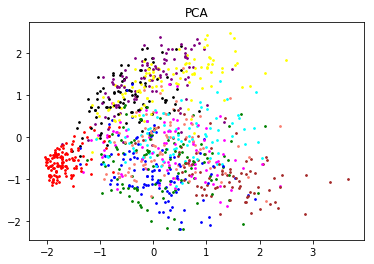

In [311]:
for i in range(len(y_train)):
    plt.scatter(X[i, 0], X[i, 1], color=c[y_train[i]], s=3)
plt.title('PCA');plt.show()

In [313]:
losses = []

for i in range(100):
    q, z, loss = gEEdEE(ps, q, z, 100)
    losses += [loss]
    
print(losses)

[722.7397056600742, 377.0640024524496, 369.42511112983647, 368.30320190320055, 367.8658633045975, 367.64257602338705, 367.509916824036, 367.4226733573809, 367.3608860464013, 367.31459533065083, 367.27836983431575, 367.24903758413404, 367.22464010522907, 367.2039106202716, 367.1859963335376, 367.17030472198064, 367.15641242450084, 367.1440100956079, 367.1328671189784, 367.1228097155361, 367.11370294876394, 367.10544046154405, 367.097935329022, 367.09111478062715, 367.0849147628925, 367.0792786897217, 367.074153287477, 367.06949059611645, 367.0652441736766, 367.06137183894236, 367.05783301373583, 367.05459125886443, 367.0516125855076, 367.0488661703344, 367.046324555013, 367.0439622296809, 367.04175799664586, 367.0396920017921, 367.0377489063793, 367.0359142814207, 367.03417675087405, 367.03252751432774, 367.03095852805217, 367.0294646801054, 367.02804097184935, 367.02668459462774, 367.02539208615684, 367.0241608783212, 367.02298839985184, 367.0218726327222, 367.0208112464883, 367.019801

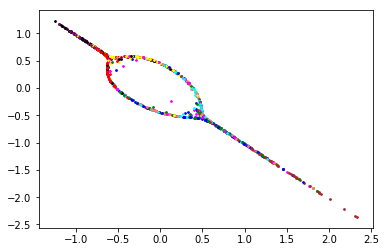

In [314]:

for i in range(len(y_train)):
    plt.scatter(z[i, 0], z[i, 1], color=c[y_train[i]], s=3)

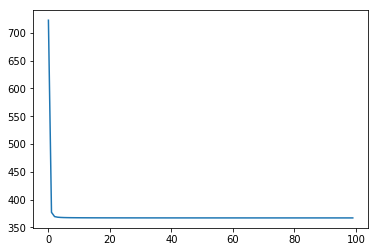

In [315]:
plt.plot(range(100), losses)
plt.show()

In [321]:
for a, b in zip('asdfsadf', 'asfdsadfsd'):
    print(a, b)

a a
s s
d f
f d
s s
a a
d d
f f


In [325]:
set('abcd'.upper()) - set('abc'.upper())

{'D'}